In [59]:
import pandas as pd
import firebase_functions
import process
import numpy as np 

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis.gensim

import matplotlib.pyplot as plt

In [24]:
# Load data
song_df = pd.read_csv('data/song_df.csv')
tokenized_lyrics = song_df['tokenized_lyrics'].values
tokenized_lyrics = [lyrics.split(' ') for lyrics in tokenized_lyrics if not isinstance(lyrics, float)]

['feel', 'stuck', 'box', 'jesus', 'walk', 'aye', 'got', 'tap', 'thought', 'still-', 'care', 'think', 'sick', 'drug', 'round', 'applause', 'stick', 'polo', 'pretty', 'pink', 'way', 'sauce', 'sauce', 'lose', 'lose', 'honest', 'thinkin', 'catch', 'track', 'feelin', 'lock', 'lose', 'blank', 'face', 'lot', 'blank', 'faced', 'smile', 'pay', 'day', 'wake', 'mornin', 'realize', 'feelin', 'bad', 'yellin', 'day', 'got', 'stairs', 'tip', 'toein', 'spliff', 'rollin', 'life', 'coastin', 'think', 'shit', 'memory', 'shit', 'quick', 'need', 'therapy', 'guess', 'note', 'feelin', 'break', 'losin', 'hope', 'startin', 'gain', 'fear', 'tight', 'rope', 'lose', 'dim', 'light', 'zone', 'lose', 'fate', 'minute', 'know', 'life', 'drop', 'tryna', 'lose', 'prove', 'shit', 'trust', 'act', 'know', 'flower', 'glass', 'vase', 'layin', 'new', 'grave', 'old', 'way', 'tombstone', 'young', 'day', 'prickle', 'grow', 'face', 'sugar', 'taste', 'midnight', 'new', 'day', 'flippin', 'page', 'sippin', 'light', 'fade', 'lookin',

In [32]:
dictionary = Dictionary(tokenized_lyrics)

In [33]:
dictionary.filter_extremes(no_below=10, no_above=0.2)

In [35]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_lyrics]

In [36]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 3707
Number of documents: 2907
[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 7), (46, 1), (47, 1), (48, 1), (49, 3), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 4), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 2), (67, 1), (68, 1), (69, 2), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 8), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 3), (87, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (1

In [53]:
# Set parameters.
num_topics = 30
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1 

In [54]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token

In [55]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

In [56]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())

[(1, '0.183*"da" + 0.110*"song" + 0.073*"sing" + 0.056*"club" + 0.050*"clap" + 0.048*"shake" + 0.031*"yah" + 0.022*"body" + 0.019*"people" + 0.015*"mm"'), (22, '0.378*"ooh" + 0.176*"ah" + 0.131*"wait" + 0.052*"doo" + 0.030*"sorry" + 0.013*"better" + 0.013*"imagine" + 0.012*"hurry" + 0.012*"motion" + 0.011*"holdin"'), (27, '0.211*"stop" + 0.095*"town" + 0.073*"waste" + 0.049*"spread" + 0.044*"cash" + 0.041*"open" + 0.041*"door" + 0.034*"sound" + 0.031*"radio" + 0.024*"knock"'), (21, '0.131*"party" + 0.123*"drink" + 0.098*"smile" + 0.071*"round" + 0.062*"check" + 0.058*"sweet" + 0.054*"lonely" + 0.034*"fill" + 0.034*"place" + 0.031*"steal"'), (20, '0.114*"na" + 0.052*"rain" + 0.050*"woo" + 0.038*"gimme" + 0.024*"yup" + 0.024*"juice" + 0.021*"stupid" + 0.015*"nasty" + 0.014*"york" + 0.013*"freedom"'), (19, '0.152*"water" + 0.119*"lie" + 0.055*"watch" + 0.052*"lift" + 0.048*"truth" + 0.046*"king" + 0.020*"wash" + 0.020*"earth" + 0.018*"fade" + 0.017*"today"'), (12, '0.076*"city" + 0.061*"b

In [47]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_lyrics, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2829779147873214


In [48]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_lyrics, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -2.7551816364227983


In [49]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

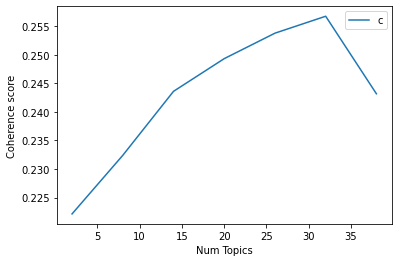

In [52]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_lyrics, start=2, limit=40, step=6)
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [83]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
LDAvis_prepared

/Users/carterward/Documents/GitHub/Topic-Mapping/.venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
25    -0.053839  0.165409       1        1  15.284254
13     0.118048  0.124726       2        1  11.438697
7      0.172006  0.065264       3        1   6.316799
11    -0.039361  0.145859       4        1   5.637948
3      0.049954  0.085523       5        1   5.637637
2     -0.136361  0.107261       6        1   4.139690
0      0.045019  0.083124       7        1   3.607527
14    -0.112102  0.072801       8        1   3.599524
10    -0.143326  0.117964       9        1   3.243090
5      0.056066  0.094467      10        1   3.114782
23     0.168207  0.004767      11        1   2.727901
9      0.023412  0.068383      12        1   2.473883
29     0.088893 -0.015446      13        1   2.441796
16     0.191985 -0.024811      14        1   2.425219
8     -0.049170 -0.029637      15        1   2.324057
18    -0.043235 -0.040216      16        1   2.307947
28    -0.045887  0.050287      17        1   2.294160
17     0.115020 -0.050926      18        1   2.261253
6     -0.078439  0.051369      19        1   2.185795
4     -0.085286 -0.005178      20        1   1.917378
24     0.033018 -0.011885      21        1   1.916505
26    -0.157641 -0.074372      22        1   1.786589
15     0.192882 -0.092152      23        1   1.767133
12    -0.081557 -0.025615      24        1   1.551432
20    -0.067958 -0.058983      25        1   1.540545
22     0.022801 -0.237034      26        1   1.297080
1     -0.091220 -0.141876      27        1   1.296501
19     0.041625 -0.087319      28        1   1.286802
21    -0.086362 -0.196214      29        1   1.090049
27    -0.047192 -0.145540      30        1   1.088025, topic_info=       Term         Freq        Total Category  logprob  loglift
1210    ooh  1512.000000  1512.000000  Default  30.0000  30.0000
506    away  1596.000000  1596.000000  Default  29.0000  29.0000
325    long  1236.000000  1236.000000  Default  28.0000  28.0000
360    stop   926.000000   926.000000  Default  27.0000  27.0000
209     god  1338.000000  1338.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1316  house    27.974513   567.132573  Topic30  -4.7874   1.5115
226     low    25.445645   504.111964  Topic30  -4.8821   1.5346
580   fight    23.014615   480.531690  Topic30  -4.9825   1.4820
435     bed    18.538283   236.334665  Topic30  -5.1988   1.9754
1091     tv    17.497746   117.223495  Topic30  -5.2566   2.6188

[1661 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1594     13  0.978385     a.m.
2671      6  0.058356  abandon
2671     15  0.758624  abandon
2671     16  0.116711  abandon
661       2  0.954844    abuse
...     ...       ...      ...
1373      2  0.988901     zero
708       5  0.063528      zip
708      15  0.889387      zip
2565     30  0.975328   zombie
2729     18  0.985363     zoom

[4672 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[26, 14, 8, 12, 4, 3, 1, 15, 11, 6, 24, 10, 30, 17, 9, 19, 29, 18, 7, 5, 25, 27, 16, 13, 21, 23, 2, 20, 22, 28])